# Temperature Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore,boxcox
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
df=pd.read_csv('Temperature.csv')
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [3]:
df.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [4]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [6]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [9]:
#There is much null values in the data. Lets drop them.

In [10]:
df.dropna(axis=0, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Date              7588 non-null   object 
 2   Present_Tmax      7588 non-null   float64
 3   Present_Tmin      7588 non-null   float64
 4   LDAPS_RHmin       7588 non-null   float64
 5   LDAPS_RHmax       7588 non-null   float64
 6   LDAPS_Tmax_lapse  7588 non-null   float64
 7   LDAPS_Tmin_lapse  7588 non-null   float64
 8   LDAPS_WS          7588 non-null   float64
 9   LDAPS_LH          7588 non-null   float64
 10  LDAPS_CC1         7588 non-null   float64
 11  LDAPS_CC2         7588 non-null   float64
 12  LDAPS_CC3         7588 non-null   float64
 13  LDAPS_CC4         7588 non-null   float64
 14  LDAPS_PPT1        7588 non-null   float64
 15  LDAPS_PPT2        7588 non-null   float64
 16  LDAPS_PPT3        7588 non-null   float64


In [12]:
# Date column is in object format.Extracting days,months and years from it.

In [13]:
df['Date'] = pd.to_datetime(df['Date'])


df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7588 non-null   float64       
 1   Date              7588 non-null   datetime64[ns]
 2   Present_Tmax      7588 non-null   float64       
 3   Present_Tmin      7588 non-null   float64       
 4   LDAPS_RHmin       7588 non-null   float64       
 5   LDAPS_RHmax       7588 non-null   float64       
 6   LDAPS_Tmax_lapse  7588 non-null   float64       
 7   LDAPS_Tmin_lapse  7588 non-null   float64       
 8   LDAPS_WS          7588 non-null   float64       
 9   LDAPS_LH          7588 non-null   float64       
 10  LDAPS_CC1         7588 non-null   float64       
 11  LDAPS_CC2         7588 non-null   float64       
 12  LDAPS_CC3         7588 non-null   float64       
 13  LDAPS_CC4         7588 non-null   float64       
 14  LDAPS_PPT1        7588 n

In [15]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820,2014.991697,7.068134,16.337375
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256,1.410877,2.242389,8.216880
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000,2013.000000,1.000000,7.000000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000,2014.000000,7.000000,8.000000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000,2015.000000,7.000000,16.000000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000,2016.000000,8.000000,24.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000,2017.000000,12.000000,31.000000


In [16]:
# In colums LDAPS_LH,DEM and LDAPS_WS are showing presence of outliers but it can be more clear with visualisation.
# Date column has no value now so drop it.

In [17]:
df.drop(['Date'],axis=1,inplace=True)

# visualisation

<Axes: xlabel='station', ylabel='Next_Tmax'>

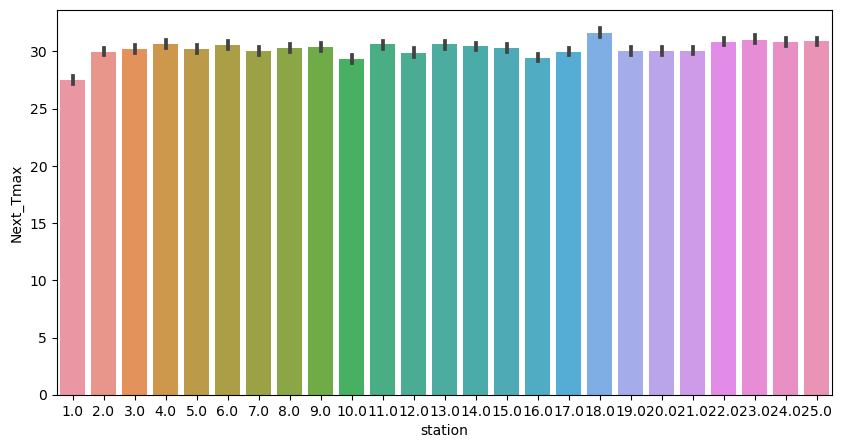

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['station'], y=df['Next_Tmax'])

<Axes: xlabel='station', ylabel='Next_Tmin'>

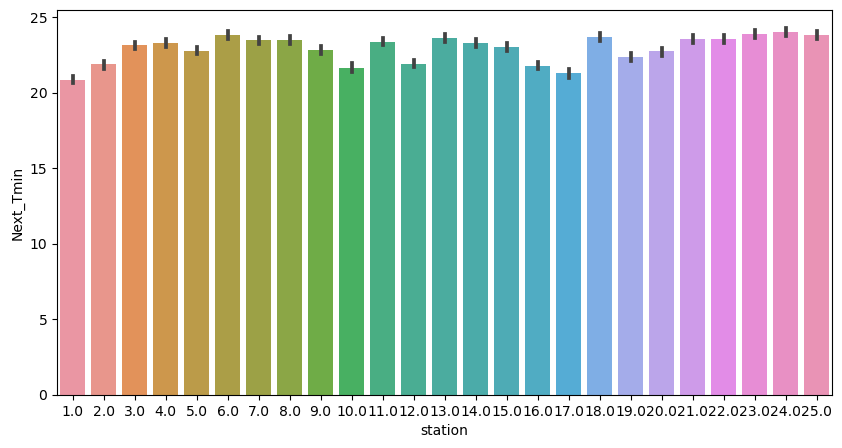

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['station'], y=df['Next_Tmin'])

In [20]:
# Higher and cooler temperature recorded at station 18 .
# Station 1 is coolest station over all.

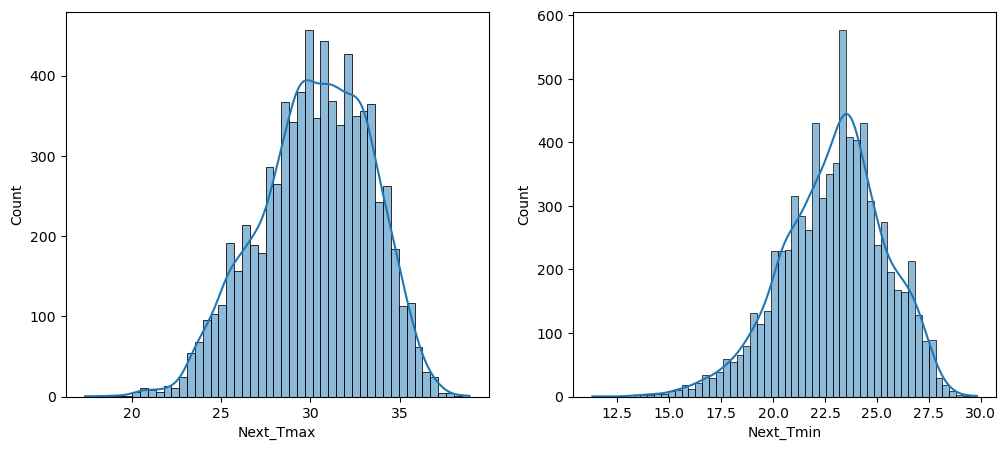

In [21]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Next_Tmax'],kde=True)
plt.subplot(1,2,2)
sns.histplot(df['Next_Tmin'],kde=True)
plt.show()

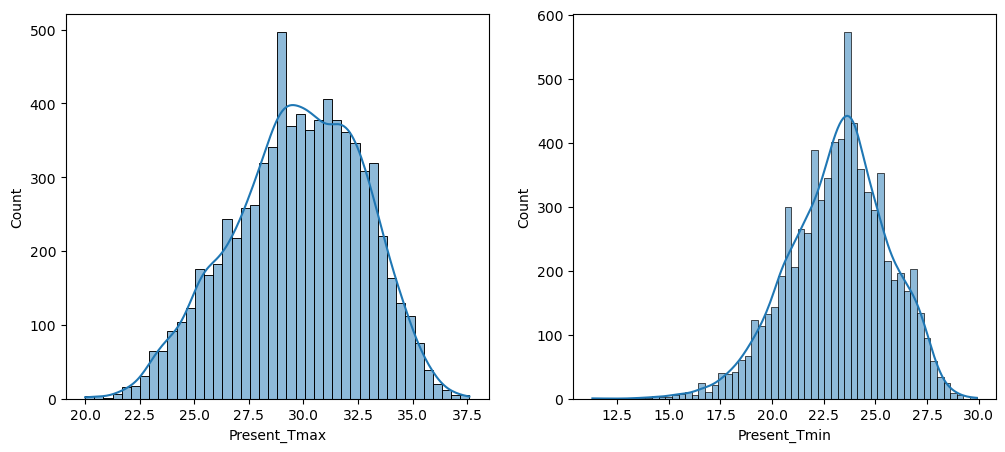

In [22]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Present_Tmax'],kde=True)
plt.subplot(1,2,2)
sns.histplot(df['Present_Tmin'],kde=True)
plt.show()

In [24]:
# majority of Next Temp Max lies in between 27.5 to 32.5 degree.
# majority of Next Temp Min lies in between 22.5 to 26 degree.

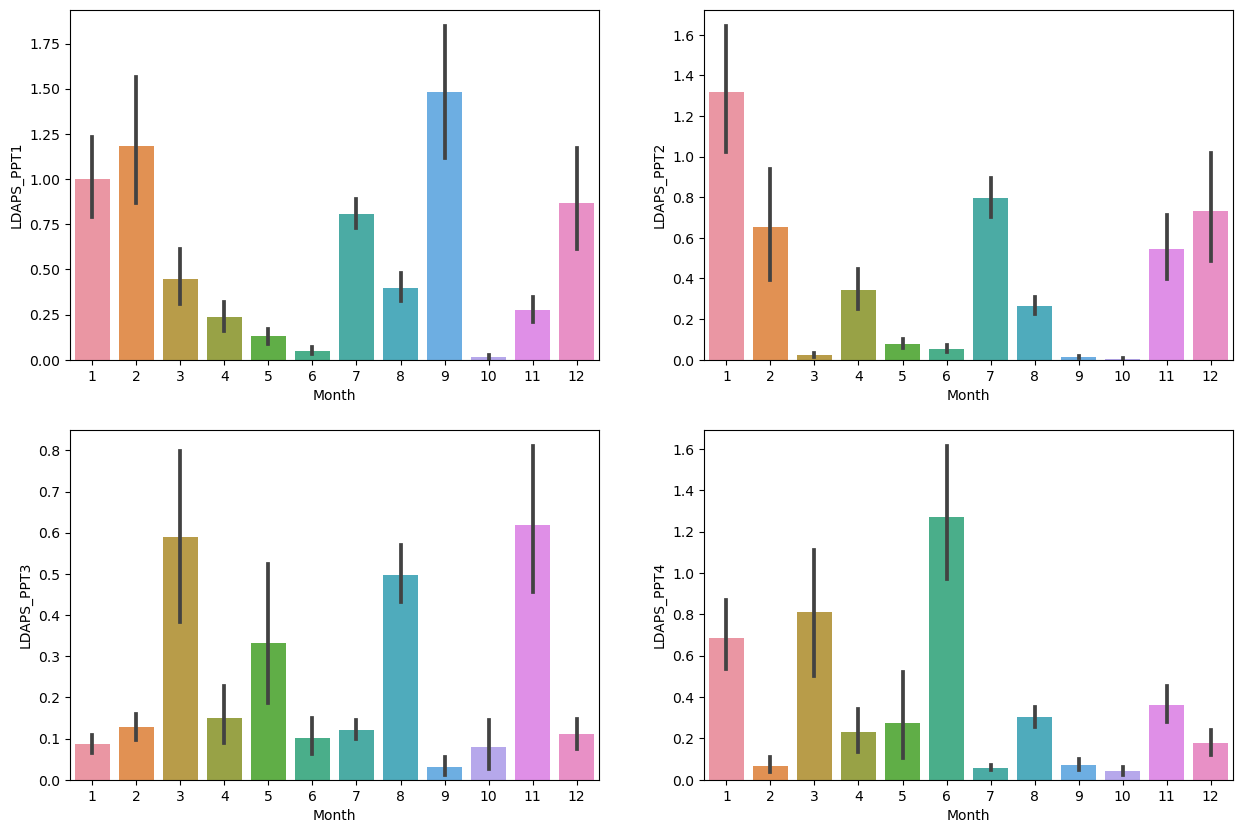

In [25]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.barplot(x=df['Month'], y=df['LDAPS_PPT1'],data=df)


plt.subplot(2,2,2)
sns.barplot(x=df['Month'], y=df['LDAPS_PPT2'],data=df)

plt.subplot(2,2,3)
sns.barplot(x=df['Month'], y=df['LDAPS_PPT3'],data=df)

plt.subplot(2,2,4)
sns.barplot(x=df['Month'], y=df['LDAPS_PPT4'],data=df)
plt.show()

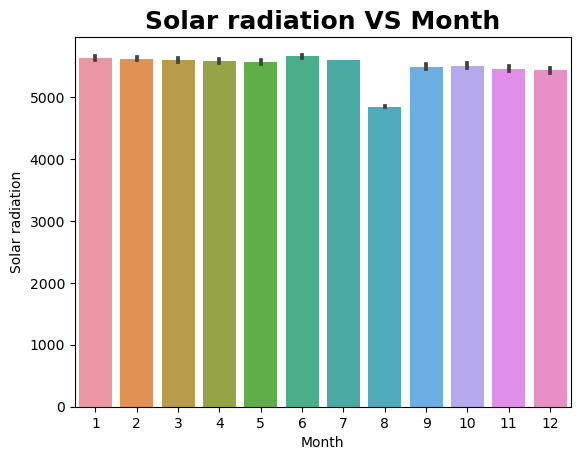

In [26]:
sns.barplot( x=df['Month'],y=df['Solar radiation'])
plt.title('Solar radiation VS Month',fontsize=18, fontweight='bold')
plt.show()

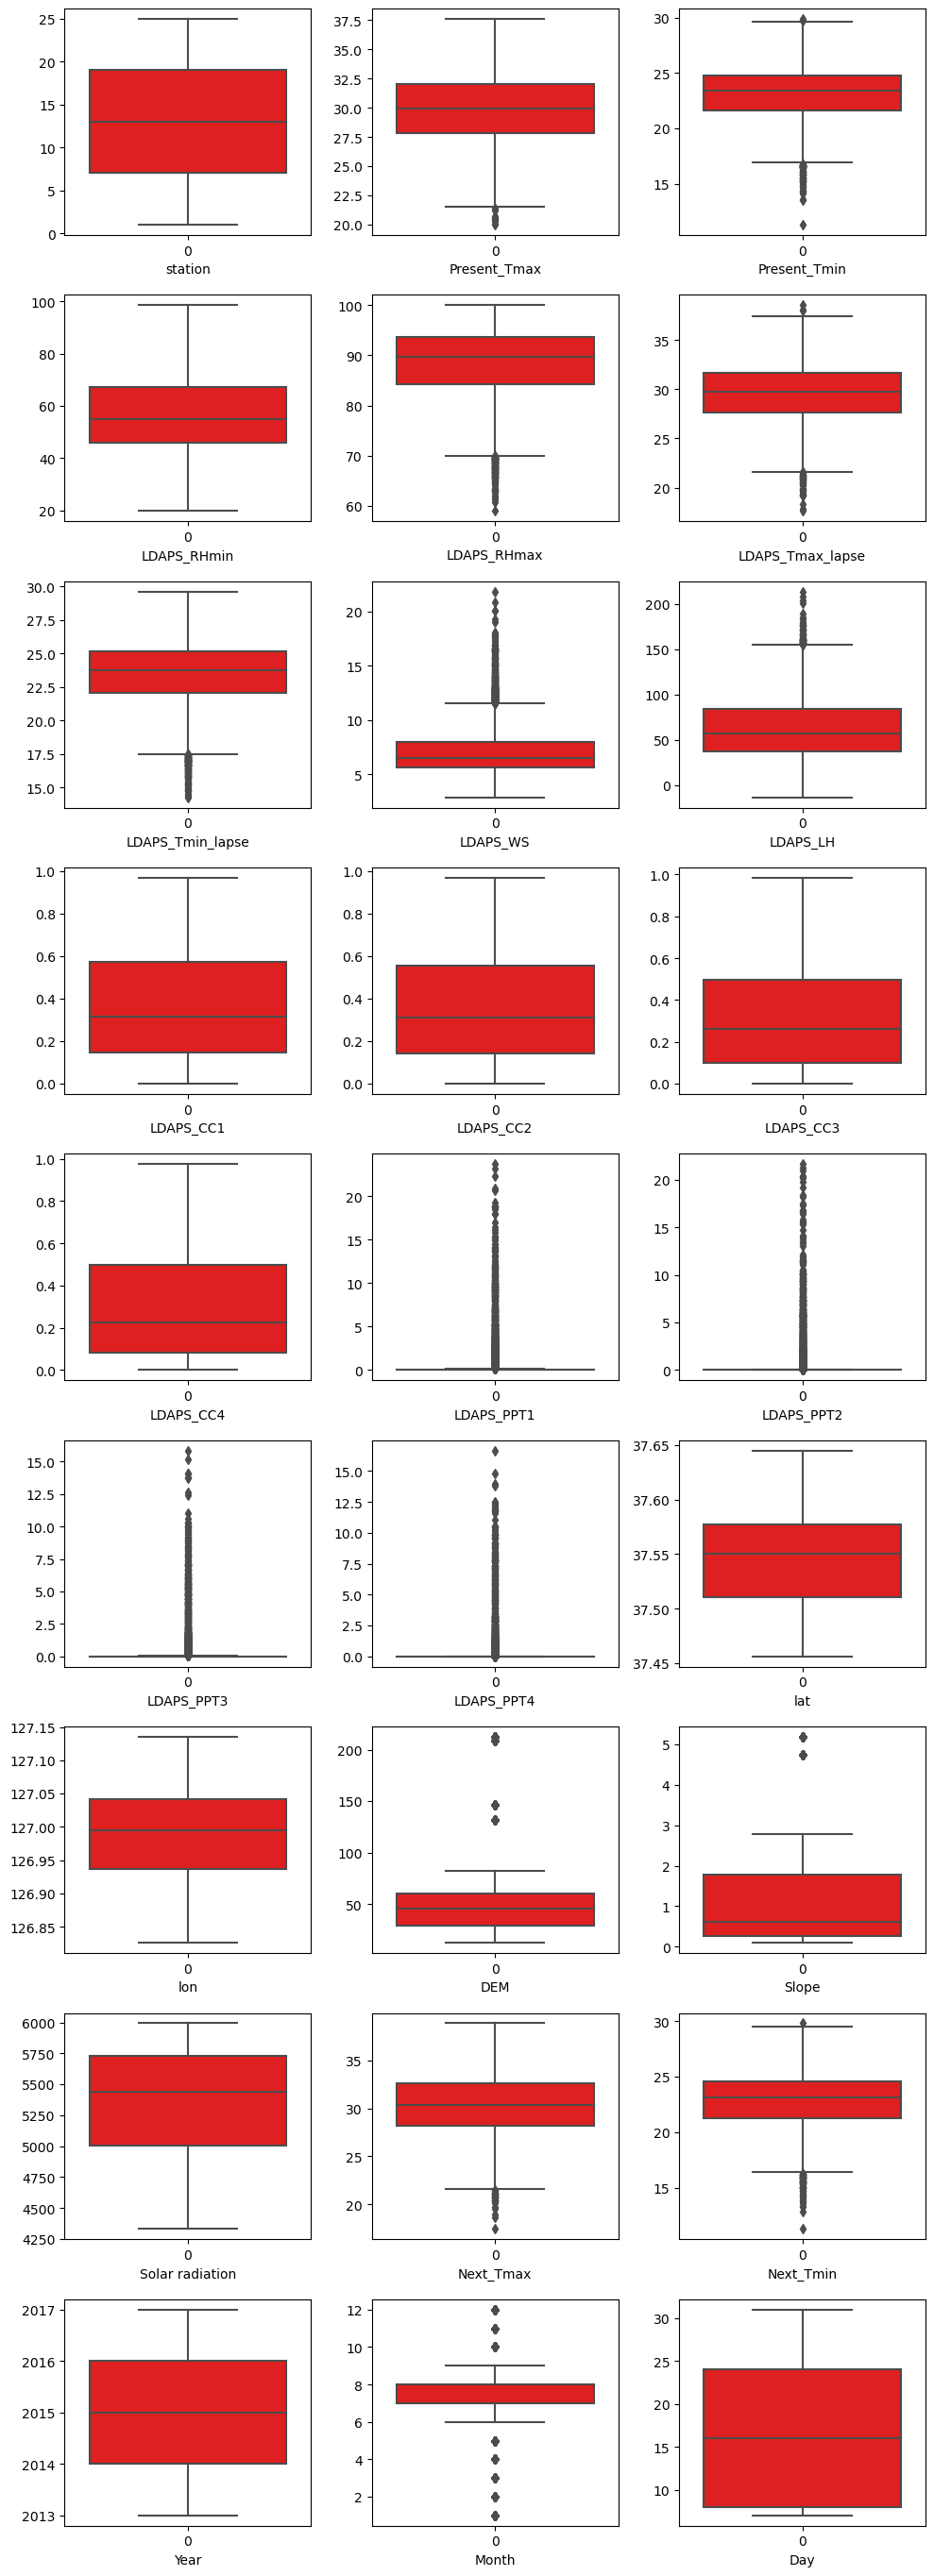

In [27]:
plt.figure(figsize=(10,30))
plotnumber=1

for column in df:
    if plotnumber<=29:
        plt.subplot(10,3,plotnumber)
        sns.boxplot(df[column],color='r')
        plt.xlabel(column)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [28]:
z=np.abs(zscore(df))

In [29]:
threshold=3
print(np.where(z>3))

(array([  25,   25,   26, ..., 7581, 7582, 7582], dtype=int64), array([ 7, 14, 14, ...,  2,  2,  6], dtype=int64))


In [30]:
DF=df[(z<3).all(axis=1)]

In [31]:
print(df.shape)
print(DF.shape)

(7588, 27)
(6739, 27)


In [32]:
df=DF.copy()

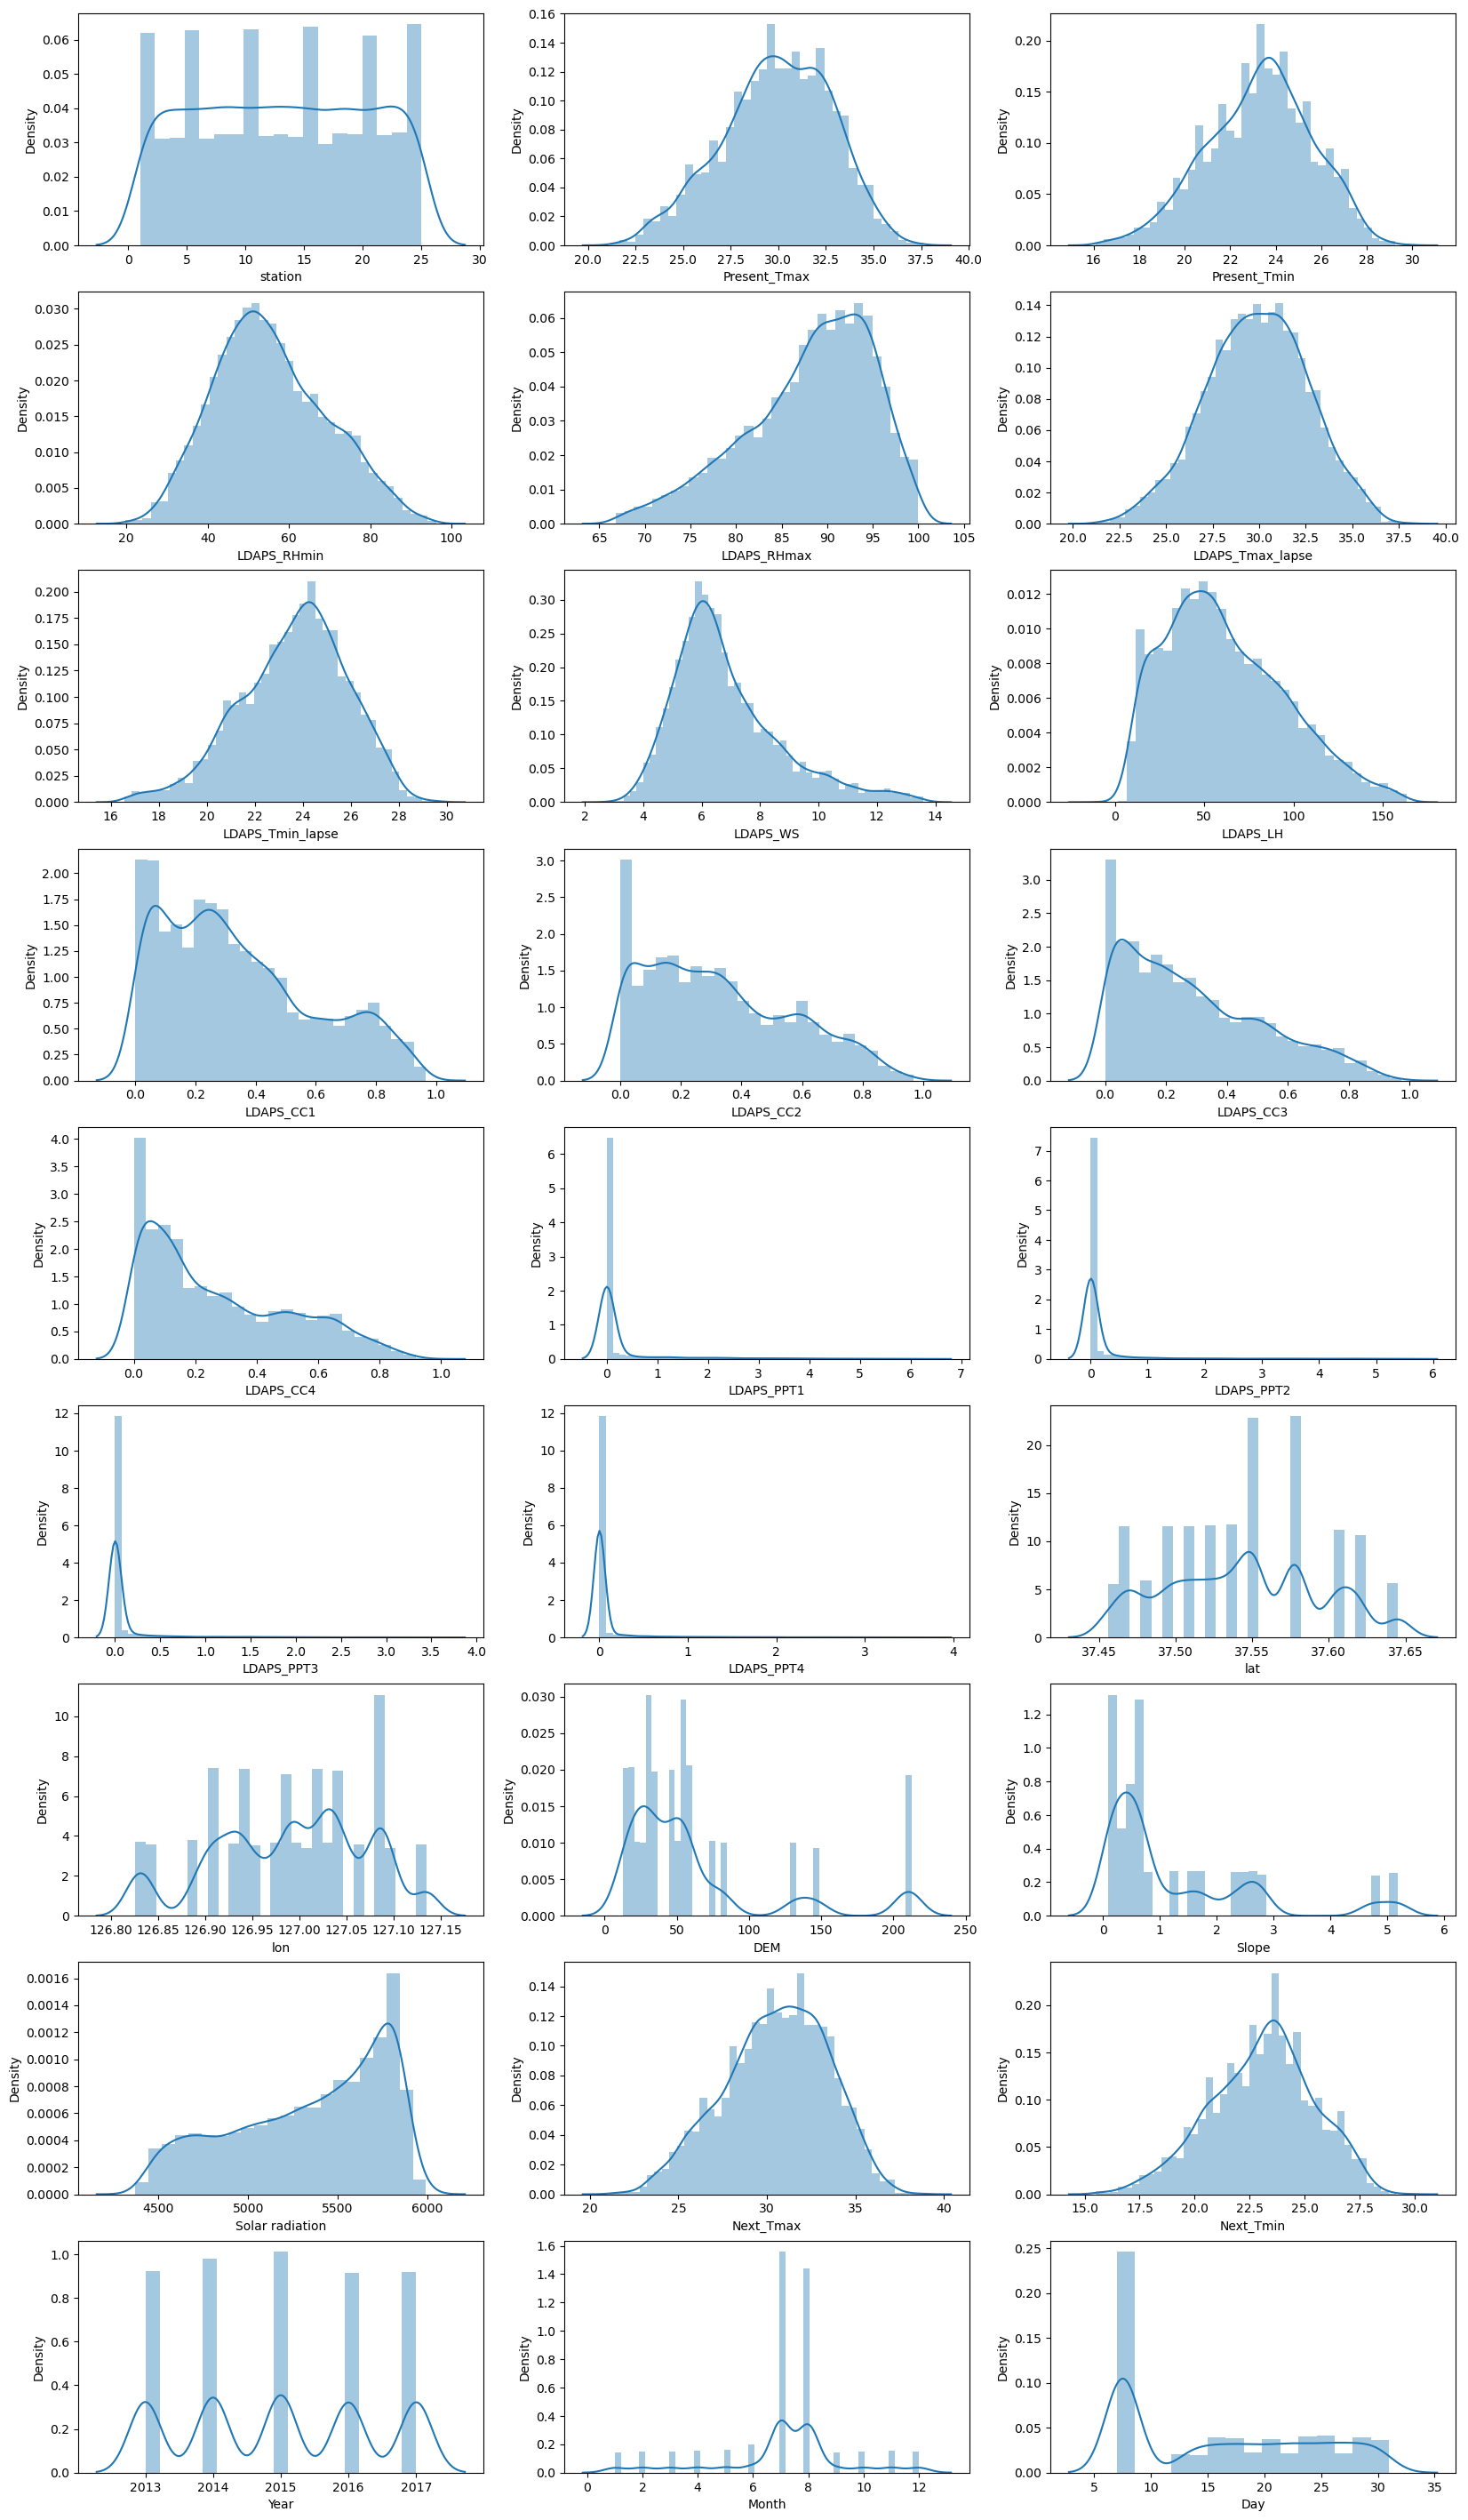

In [33]:
plt.figure(figsize=(20,40))

plotnum=1
for col in df:
    if plotnum<=29:
        plt.subplot(10,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col)
    plotnum+=1
plt.show()

In [34]:
df.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Year                0.025066
Month              -0.680725
Day                 0.256528
dtype: float64

In [35]:
df[['LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']]=boxcox(df[['LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']],.05)

In [36]:
# Removed outliers and skewness

<Axes: >

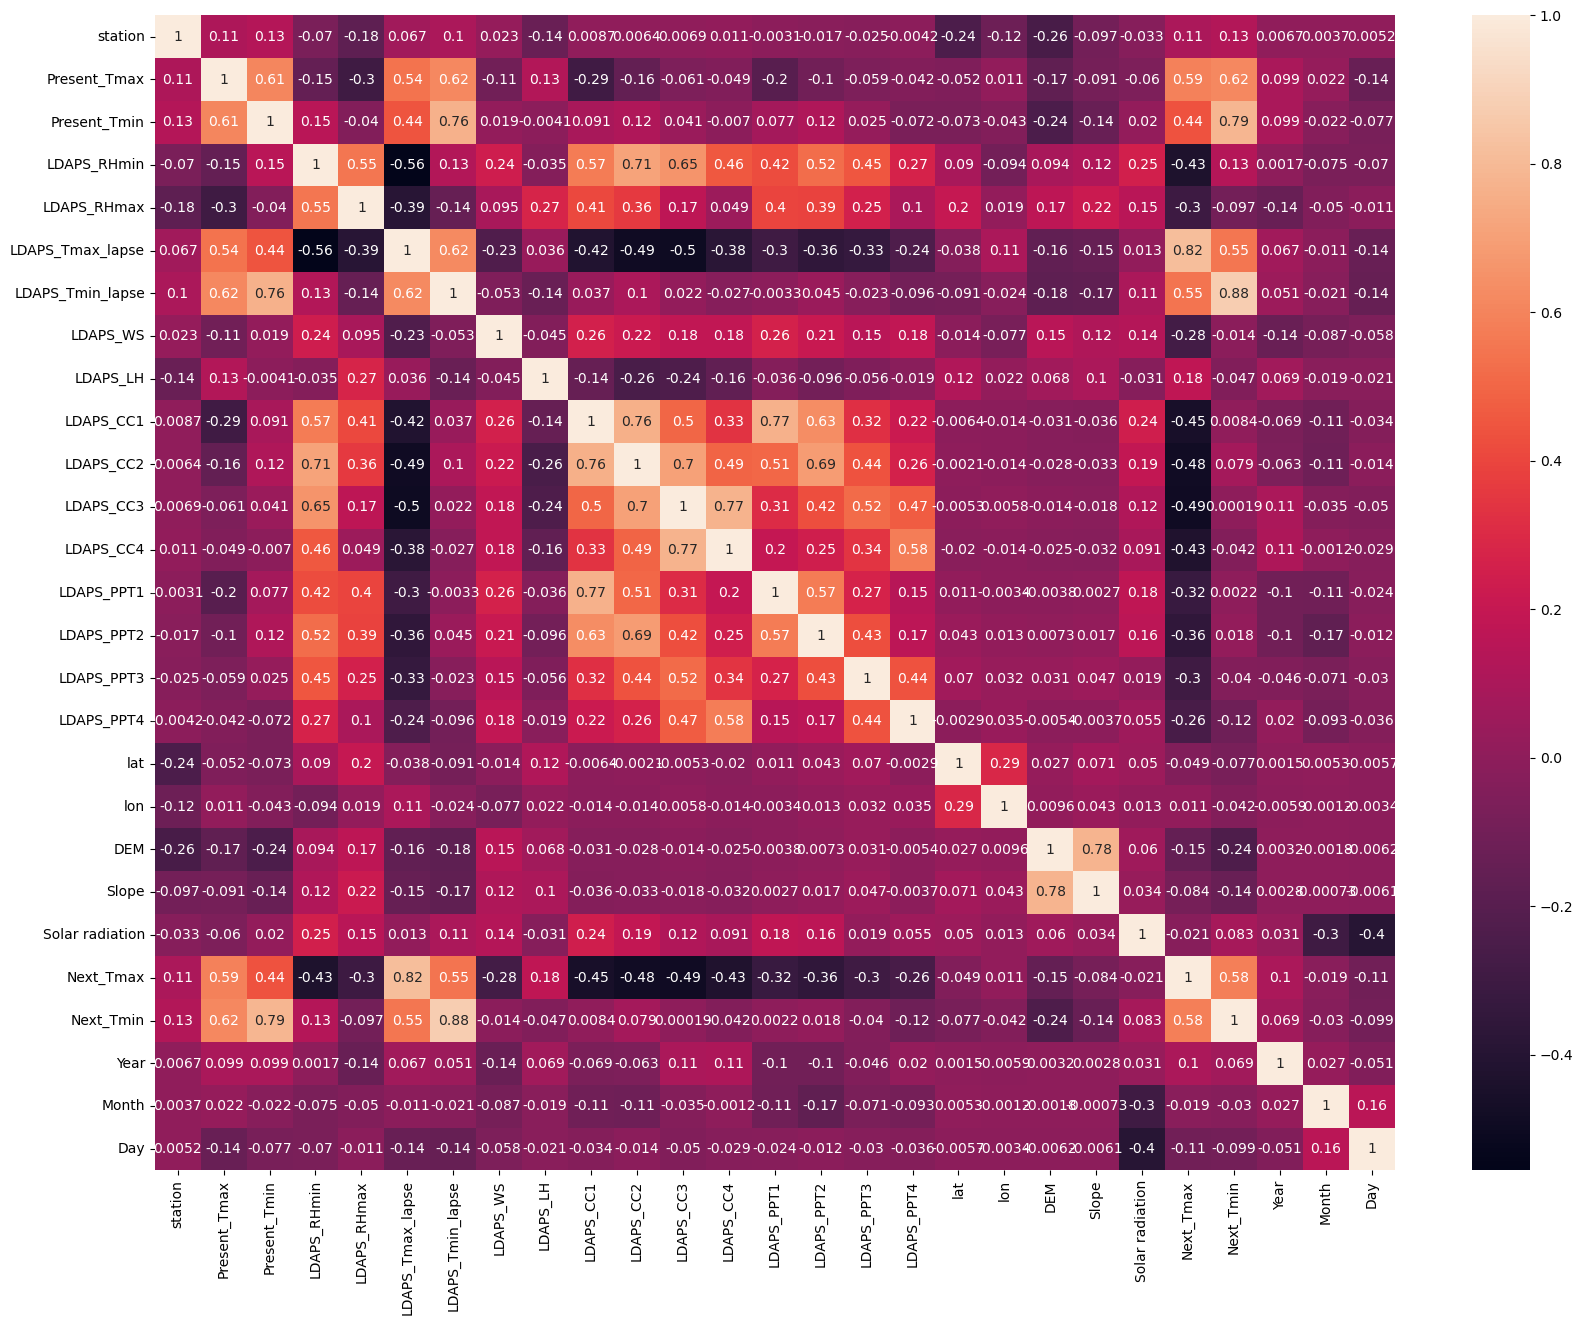

In [37]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

In [43]:
# Checking multicolinearity

In [44]:
X=df[['LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4','LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4']]

In [45]:
vif=pd.DataFrame()

In [46]:
vif['features']=X.columns
vif['vif_factors']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]

In [47]:
vif

,features,vif_factors
0,LDAPS_CC1,9.812293
1,LDAPS_CC2,13.071515
2,LDAPS_CC3,10.881061
3,LDAPS_CC4,7.059186
4,LDAPS_PPT1,7.531004
5,LDAPS_PPT2,8.416483
6,LDAPS_PPT3,7.887758
7,LDAPS_PPT4,8.279101


In [48]:
x=df.drop(['Next_Tmax'],axis=1)
y=df['Next_Tmax']

In [49]:
# Scaling

In [50]:
scaler= StandardScaler()
X_sca = scaler.fit_transform(x)

In [51]:
# Using PCA

In [52]:
pca=PCA(n_components=15)

In [53]:
xpca=pca.fit_transform(X_sca)

In [54]:
x=pd.DataFrame(xpca)

In [55]:
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.279376,2.721627,-2.623754,0.620028,-0.050386,0.526519,-1.123309,0.072235,1.015641,-1.249293,-0.870281,-0.936522,-1.266929,0.458066,0.085465
1,-1.169957,0.750476,-0.715364,-0.699757,-0.844320,-1.245400,-1.024517,0.229829,1.138069,-1.359574,-0.717625,-0.819801,-1.200229,0.198935,0.003929
2,-1.459976,-0.189045,0.023276,-0.689704,-0.423559,-0.917060,-1.936816,0.186882,1.036208,-1.285913,-0.972816,-0.703228,-1.122689,0.026412,-0.325046
3,-0.877203,0.541582,-1.982394,-0.190814,-1.401559,-0.846007,-0.646396,0.300469,0.977140,-1.147385,-0.216195,-1.672928,-1.405296,0.563533,0.262788
4,-1.160644,0.909296,-0.779935,-0.545513,-1.110303,-1.524024,-0.235944,0.721321,0.249632,-0.873144,-0.325068,-0.290150,-2.107400,-1.158175,-0.583877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6734,-2.497669,4.888208,3.218685,-1.261710,-0.269692,0.124790,-1.157477,-0.716365,-1.752315,0.665762,-0.509450,-0.756923,1.205046,0.403002,-0.715169
6735,-2.223479,5.401193,2.803796,-1.451432,-0.864923,-0.327380,0.512752,-0.460214,-2.289975,0.751567,-0.058451,-0.146879,0.288407,-0.556217,-1.077084
6736,-2.429672,4.877083,3.249819,-1.550957,-0.240960,0.599411,1.197131,-0.554343,-1.338593,0.370781,-0.552396,-0.878280,1.269603,0.419478,-0.082770
6737,-2.586354,4.513028,3.484004,-1.551092,0.044417,0.865523,0.541749,-0.546261,-1.460598,0.453817,-0.601538,-0.821206,1.314315,0.475028,-0.321911


In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from sklearn.model_selection import GridSearchCV

In [57]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=42, test_size=.3)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(4717, 15)
(4717,)
(2022, 15)
(2022,)


In [58]:
best_random_state = 0
best_score = 0

for i in range(100):
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=i)
    lr = LinearRegression()
    lr.fit(xtrain, ytrain)
    score = lr.score(xtest, ytest)
    
    if score > best_score:
        best_score = score
        best_random_state = i

print('Best random state:', best_random_state)
print('Best score:', best_score)

Best random state: 84
Best score: 0.7727415189235587


In [67]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, random_state=84, test_size=.3)
lr=LinearRegression()
lr.fit(xtrain,ytrain)
lr.score(xtrain,ytrain)
y_pred=lr.predict(xtest)


In [68]:
print('Mean absolute error :', mean_absolute_error(ytest,y_pred))
print('Mean squared error :', mean_squared_error(ytest,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(ytest,y_pred)))
print('r2 score:',r2_score(ytest,y_pred))

Mean absolute error : 1.0941591482132578
Mean squared error : 2.0103557728261525
Root Mean Squared Error: 1.4178701537257044
r2 score: 0.7727415189235587


In [69]:
# Checking cross validation

In [70]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lr, x, y, cv =5)
print(score.mean())

0.6659645576716983


In [71]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
svr=SVR()
model = [rf,XT,dtc,adb,gradb,svr]

for m in model:
    m.fit(xtrain,ytrain)
    m.score(xtrain,ytrain)
    y_pred = m.predict(xtest)                                        
    print( m)
    print('Mean absolute error :', mean_absolute_error(ytest,y_pred))
    print('Mean squared error :', mean_squared_error(ytest,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(ytest,y_pred)))
    
    print(r2_score(ytest,y_pred)) 
    print('=='*40)


RandomForestRegressor()
Mean absolute error : 0.8878664688427301
Mean squared error : 1.3284262482690403
Root Mean Squared Error: 1.1525737496008837
0.8498295000892837
ExtraTreesRegressor()
Mean absolute error : 0.8495801186943626
Mean squared error : 1.2017805257171124
Root Mean Squared Error: 1.0962575088532402
0.8641460280048969
DecisionTreeRegressor()
Mean absolute error : 1.2791790306627102
Mean squared error : 3.124327398615232
Root Mean Squared Error: 1.7675767023287086
0.6468138084849286
AdaBoostRegressor()
Mean absolute error : 1.344763899812727
Mean squared error : 2.797581737800728
Root Mean Squared Error: 1.6725973029395713
0.6837504162131387
GradientBoostingRegressor()
Mean absolute error : 1.032239086398009
Mean squared error : 1.7685123101773794
Root Mean Squared Error: 1.3298542439596075
0.80008045003353
SVR()
Mean absolute error : 0.8208834366012441
Mean squared error : 1.2177074320567463
Root Mean Squared Error: 1.1034978169696332
0.8623455882061724


In [72]:
# Checked other models 
# Extra Trees Regressor has highest r2 score

In [73]:
# Hyperparameter Tuning

In [74]:
XT=ExtraTreesRegressor()
param=({'n_estimators':[50,100,200]})
gsc=GridSearchCV(XT,param,)
gsc.fit(xtrain,ytrain)
gsc.best_params_

{'n_estimators': 200}

# Best Model

In [75]:
best_model=ExtraTreesRegressor(n_estimators=200)
best_model.fit(xtrain,ytrain)
predi=best_model.predict(xtest)
print('Mean absolute error :', mean_absolute_error(ytest,predi))
print('Mean squared error :', mean_squared_error(ytest,predi))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(ytest,predi)))
    
print(r2_score(ytest,predi)) 


Mean absolute error : 0.842677794263106
Mean squared error : 1.1887598287586543
Root Mean Squared Error: 1.0903026317305917
0.8656179385260759


True Values Vs Predicted Value plot :


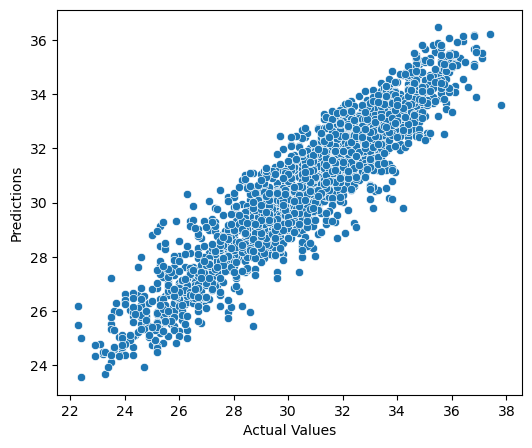

In [76]:
plt.figure(figsize=(6,5))
predi=best_model.predict(xtest)
sns.scatterplot(x=ytest,y=predi)
print( 'True Values Vs Predicted Value plot :' )
plt.xlabel('Actual Values' )
plt.ylabel('Predictions')
plt.show()

In [77]:
import joblib
joblib.dump(best_model,'temp.obj')

['temp.obj']

In [78]:
Model = joblib.load('temp.obj')
actual = np.array(ytest)
predicted = np.array(best_model.predict(xtest))
df_Predicted = pd.DataFrame({"Actual Values":actual,"Predicted Values":predicted})
df_Predicted 

,Actual Values,Predicted Values
0,31.4,31.7300
1,31.6,31.6215
2,32.9,32.5005
3,29.2,30.1020
4,29.6,28.3840
...,...,...
2017,29.9,30.3110
2018,31.1,31.9775
2019,31.4,29.6185
2020,28.2,29.5435


# Precting Next Minimum Temperature

In [80]:
X = df.drop(['Next_Tmin'], axis =1)
Y = df['Next_Tmin']

In [81]:
# Scaling
X = scaler.fit_transform(X)

In [82]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, random_state=42, test_size=.33)
print(Xtrain.shape)
print(Ytrain.shape)
print(Xtest.shape)
print(Ytest.shape)

(4515, 26)
(4515,)
(2224, 26)
(2224,)


In [83]:
best_random_state = 0
best_score = 0

for i in range(100):
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=i)
    lr = LinearRegression()
    lr.fit(xtrain, ytrain)
    score = lr.score(xtest, ytest)
    
    if score > best_score:
        best_score = score
        best_random_state = i

print('Best random state:', best_random_state)
print('Best score:', best_score)

Best random state: 84
Best score: 0.7850847710046001


In [84]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, random_state=84, test_size=.2)
lr=LinearRegression()
lr.fit(Xtrain,Ytrain)
lr.score(Xtrain,Ytrain)
Ypred=lr.predict(Xtest)

In [85]:
print('Mean absolute error :', mean_absolute_error(Ytest,Ypred))
print('Mean squared error :', mean_squared_error(Ytest,Ypred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Ytest,Ypred)))
print('\n')

print(r2_score(Ytest,Ypred))

Mean absolute error : 0.7552292085972612
Mean squared error : 0.913826157753954
Root Mean Squared Error: 0.9559425494003048


0.8366009459085417


In [87]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
adb=AdaBoostRegressor()
gb=GradientBoostingRegressor()
svr=SVR()
models = [rf,XT,dtc,adb,gb,svr]

for n in models:
    n.fit(Xtrain,Ytrain)
    n.score(Xtrain,Ytrain)
    Y_pred = n.predict(Xtest)                                        
    print( n)
    print('Mean absolute error :', mean_absolute_error(Ytest,Y_pred))
    print('Mean squared error :', mean_squared_error(Ytest,Y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Ytest,Y_pred)))
    
    print(r2_score(Ytest,Y_pred)) 
    print('=='*40)

RandomForestRegressor()
Mean absolute error : 0.5531676557863501
Mean squared error : 0.5346066498516321
Root Mean Squared Error: 0.7311680038483851
0.9044082726724921
ExtraTreesRegressor()
Mean absolute error : 0.5062218100890209
Mean squared error : 0.46343254080118734
Root Mean Squared Error: 0.6807587978140183
0.9171347436713407
DecisionTreeRegressor()
Mean absolute error : 0.8238130563798219
Mean squared error : 1.2176780415430266
Root Mean Squared Error: 1.1034844999106361
0.7822699224707008
AdaBoostRegressor()
Mean absolute error : 0.8529641802483544
Mean squared error : 1.11123826140912
Root Mean Squared Error: 1.0541528643461155
0.8013021631698841
GradientBoostingRegressor()
Mean absolute error : 0.6092392656202492
Mean squared error : 0.6109326206151777
Root Mean Squared Error: 0.7816217887285242
0.8907606096902583
SVR()
Mean absolute error : 0.4942945557003205
Mean squared error : 0.4237255591083307
Root Mean Squared Error: 0.65094205510808
0.9242346534237452


In [88]:
parameter = {'n_estimators':[50,75,100]}
GCV = GridSearchCV(XT,parameter)
GCV.fit(Xtrain,Ytrain)
print(GCV.best_params_)

{'n_estimators': 100}


# Best Model

In [90]:
Best_mod=ExtraTreesRegressor(n_estimators=100)
Best_mod.fit(Xtrain,Ytrain)
Y_pred=Best_mod.predict(Xtest)
                                       

print('Mean absolute error :', mean_absolute_error(Ytest,Y_pred))
print('Mean squared error :', mean_squared_error(Ytest,Y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Ytest,Y_pred)))
print(r2_score(Ytest,Y_pred)) 


Mean absolute error : 0.49980637982195897
Mean squared error : 0.45353954525222595
Root Mean Squared Error: 0.6734534469822142
0.9189036863757217


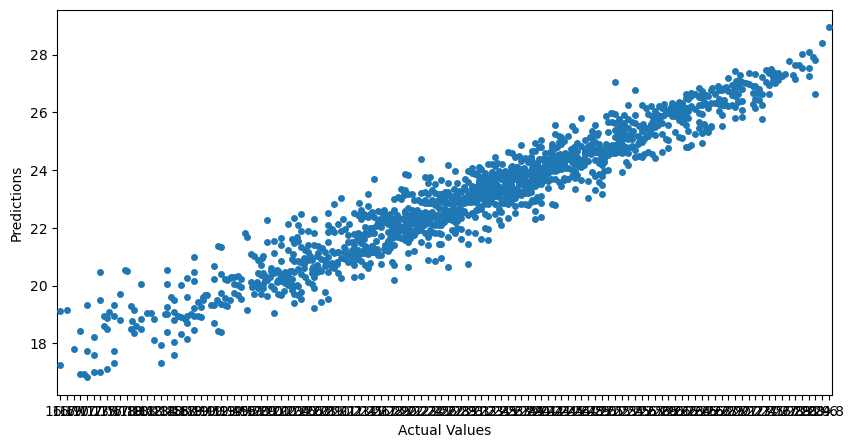

In [91]:
plt.figure(figsize=(10,5))
Y_pred=Best_mod.predict(Xtest)
sns.swarmplot(x=Ytest,y= Y_pred)
plt.xlabel('Actual Values' )
plt.ylabel('Predictions')
plt.show()

In [92]:
import joblib
joblib.dump(Best_mod,'Temperature.obj')

['Temperature.obj']